<a href="https://colab.research.google.com/github/piigor/mba/blob/main/TRABALHO_FINAL_ANALISE_DADOS_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados em Python

Nome: Paulo Igor Pinheiro de Oliveira<br>
Matrícula: 2027223

Prof. Erneson A. Oliveira<br>
MBA em Gestão Analítica com BI e Big Data<br>
Universidade de Fortaleza

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
from datetime import date,datetime,timedelta
from dateutil.parser import parse
import numpy as np
import pandas as pd

In [ ]:
pip install Unidecode

     |████████████████████████████████| 235 kB 5.1 MB/s 


In [ ]:
pip install wordcloud

In [ ]:
# definir caminho dos datasets
caminho = '/content/drive/MyDrive/pos unifor/Programação/datasets/'


In [ ]:
# Criar data frames
import re
df_B = pd.read_json(caminho+'jairbolsonaro.json')
df_L = pd.read_json(caminho+'LulaOficial.json')

#  df_B.info()
# df_L.info()

cols = ['created_at', 'full_text']
df_B_f = df_B[cols]
df_L_f = df_L[cols]

In [69]:
# Higenização LULA

# Fazer limpeza caracter esepecial de dados LULLA

for l in range(14961):
  df_L_f['full_text'][l] = df_L_f['full_text'][l].lower() # Transformar todas as palavras em MAIUCULAS
  df_L_f['full_text'][l] = re.sub(r'[.,\-?!^~;:"#$%¨&*_+=§£¢¬<>]', '',df_L_f['full_text'][l]) # retirar caracter especial
  


# Fazer o split do texto para criar a lista de palavras
palavras_L=[]
for x in range(14961):
  palavras= df_L_f['full_text'][x].split()
  for y in range (len(palavras)):
    palavras_L.append(palavras[y])

# Tirar acentuação de palavras

import unidecode 
for w in range(len(palavras_L)): 
    
    palavras_L[w] = unidecode.unidecode(palavras_L[w]) 

len(palavras_L)

from wordcloud import STOPWORDS

# Fazer o split do texto para criar a lista de palavras
lista_stopword  = ['de','pra','vai','fazer','anos','agora','porque','a','o','que','e','do','da','em','um','para',
                   'e','com','nao','uma','os','no','se','na','por','mais','as','dos','como','mas','foi','ao','ele',
                   'das','tem','a','seu','sua','ou','ser','quando','muito','ha','nos','ja','esta','eu','tambem','so',
                   'pelo','pela','ate','isso','ela','entre','era','depois','sem','mesmo','aos','ter','seus','quem',
                   'nas','me','esse','eles','estao','voce','tinha','foram','essa','num','nem','suas','meu','as',
                   'minha','tem','numa','pelos','elas','havia','seja','qual','sera','nos','tenho','lhe','deles',
                   'essas','esses','pelas','este','fosse','dele','tu','te','voces','vos','lhes','meus','minhas',
                   'teu','tua','teus','tuas','nosso','nossa','nossos','nossas','dela','delas','esta','estes',
                   'estas','aquele','aquela','aqueles','aquelas','isto','aquilo','estou','esta','estamos',
                   'estao','estive','esteve','estivemos','estiveram','estava','estavamos','estavam','estivera',
                   'estiveramos','esteja','estejamos','estejam','estivesse','estivessemos','estivessem','estiver',
                   'estivermos','estiverem','hei','ha','havemos','hao','houve','houvemos','houveram','houvera',
                   'houveramos','haja','hajamos','hajam','houvesse','houvessemos','houvessem','houver','houvermos',
                   'houverem','houverei','houvera','houveremos','houverao','houveria','houveriamos','houveriam',
                   'sou','somos','sao','era','eramos','eram','fui','foi','fomos','foram','fora','foramos','seja',
                   'sejamos','sejam','fosse','fossemos','fossem','for','formos','forem','serei','sera','seremos',
                   'serao','seria','seriamos','seriam','tenho','tem','temos','tem','tinha','tinhamos','tinham',
                   'tive','teve','tivemos','tiveram','tivera','tiveramos','tenha','tenhamos','tenham','tivesse',
                   'tivessemos','tivessem','tiver','tivermos','tiverem','terei','tera','teremos','terao','teria',
                   'teriamos','teriam','hoje','vivo','dia','aqui','sobre','vamos','pode','quero','fala',]+ list(STOPWORDS)
palavras_L_FINAL=[]
for i in range(len(palavras_L)):
    if palavras_L[i] not in lista_stopword:
      palavras_L_FINAL.append(palavras_L[i])
len(palavras_L_FINAL)
# palavras_L_FINAL.clear()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


170755

In [96]:
# Criar dicionário com contage de palavra da lista do LULA
dic_L ={}
for p in palavras_L_FINAL:
  if p in dic_L:
     dic_L[p] =dic_L[p] +1
  else:
     dic_L[p] = 1

# dic_L.clear()


df_L = pd.DataFrame(list(dic_L.items()), columns = ['Palavras', 'Q'])
df_L= df_L.sort_values('Q',ascending=False)


print(df_L.head(10)) #mostrar os dois primeiros valores


            Palavras     Q
1               lula  5235
92              pais  1702
197           brasil  1469
113             povo  1316
82    lulapelobrasil  1169
44             gente   924
0         presidente   920
9    @haddadfernando   673
427          governo   647
30                pt   630


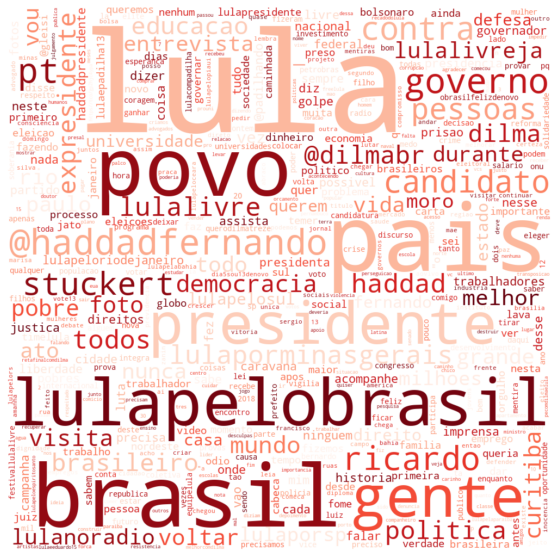

In [94]:
# Criar WordCloud do Lula
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

wc = WordCloud(background_color="white", colormap='Reds_r', max_words=500,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate_from_frequencies(dic_L) #ajuste do tamanho das palavras
plt.figure( figsize=(20,10) ) #ajustar tamanho imagem
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('lula.jpg')
plt.show()


In [91]:
# Higenização Bolsonaro

# Fazer limpeza caracter esepecial de dados Bolsonaro
for l in range(6793):
  df_B_f['full_text'][l] = df_B_f['full_text'][l].lower() # Transformar todas as palavras em MAIUCULAS
  df_B_f['full_text'][l] = re.sub(r'[.,\-?!^~;:"#$%¨&*_+=§£¢¬<>]', '',df_B_f['full_text'][l]) # retirar caracter especial


# Fazer o split do texto para criar a lista de palavras
palavras_B=[]
for x in range(6793):
  palavras= df_B_f['full_text'][x].split()
  for y in range (len(palavras)):
    palavras_B.append(palavras[y])

# Tirar acentuação de palavras


import unidecode 
for w in range(len(palavras_B)): 
    
    palavras_B[w] = unidecode.unidecode(palavras_B[w]) 

len(palavras_B)
# palavras_B.clear()

# Fazer o split do texto para criar a lista de palavras
lista_stopword  = ['de','pra','vai','porque','a','o','que','e','do','da','em','um','para','e','com','nao','uma',
                   'os','no','se','na','por','mais','as','dos','como','mas','foi','ao','ele','das','tem','a','seu',
                   'sua','ou','ser','quando','muito','ha','nos','ja','esta','eu','tambem','so','pelo','pela','ate',
                   'isso','ela','entre','era','depois','sem','mesmo','aos','ter','seus','quem','nas','me','esse',
                   'eles','estao','voce','tinha','foram','essa','num','nem','suas','meu','as','minha','tem','numa',
                   'pelos','elas','havia','seja','qual','sera','nos','tenho','lhe','deles','essas','esses','pelas',
                   'este','fosse','dele','tu','te','voces','vos','lhes','meus','minhas','teu','tua','teus','tuas',
                   'nosso','nossa','nossos','nossas','dela','delas','esta','estes','estas','aquele','aquela','aqueles',
                   'aquelas','isto','aquilo','estou','esta','estamos','estao','estive','esteve','estivemos','estiveram',
                   'estava','estavamos','estavam','estivera','estiveramos','esteja','estejamos','estejam','estivesse',
                   'estivessemos','estivessem','estiver','estivermos','estiverem','hei','ha','havemos','hao','houve',
                   'houvemos','houveram','houvera','houveramos','haja','hajamos','hajam','houvesse','houvessemos',
                   'houvessem','houver','houvermos','houverem','houverei','houvera','houveremos','houverao','houveria',
                   'houveriamos','houveriam','sou','somos','sao','era','eramos','eram','fui','foi','fomos','foram',
                   'fora','foramos','seja','sejamos','sejam','fosse','fossemos','fossem','for','formos','forem','serei',
                   'sera','seremos','serao','seria','seriamos','seriam','tenho','tem','temos','tem','tinha','tinhamos',
                   'tinham','tive','teve','tivemos','tiveram','tivera','tiveramos','tenha','tenhamos','tenham','tivesse',
                   'tivessemos','tivessem','tiver','tivermos','tiverem','terei','tera','teremos','terao','teria',
                   'teriamos','teriam','sobre','','q','dia','d','p/','c/','boa','n','/',')','(','vamos','bem','bom','todo',
                   'agora','hoje','sempre']+ list(STOPWORDS)
palavras_B_FINAL=[]
for i in range(len(palavras_B)):
    if palavras_B[i] not in lista_stopword:
      palavras_B_FINAL.append(palavras_B[i])
len(palavras_B_FINAL)
# palavras_B_FINAL.clear()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


83979

In [97]:
# Criar dicionário com contage de palavra da lista do Bolsonaro
dic_B ={}
for p in palavras_B_FINAL:
  if p in dic_B:
     dic_B[p] =dic_B[p] +1
  else:
     dic_B[p] = 1

# dic_B.clear()


df_B = pd.DataFrame(list(dic_B.items()), columns = ['Palavras', 'Q'])
df_B= df_B.sort_values('Q',ascending=False)

print(df_B.head(10)) #mostrar os dois primeiros valores


      Palavras     Q
139     brasil  1254
305  bolsonaro   803
20       todos   590
53     governo   388
181   obrigado   349
19      abraco   318
150     grande   287
915         pt   283
304       jair   273
276       pais   240


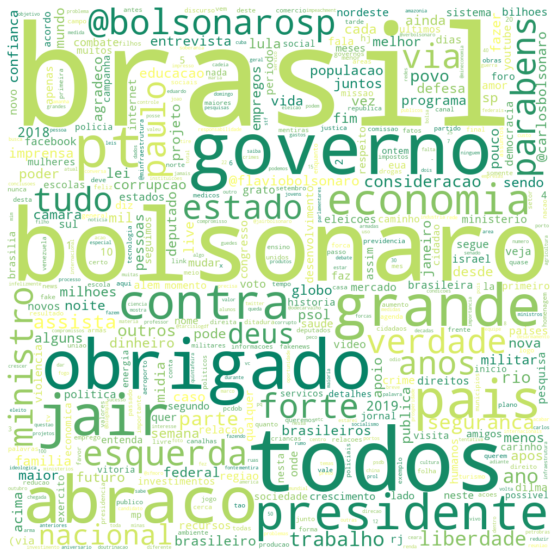

In [95]:
# Criar WordCloud do Bolsonaro
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

wc = WordCloud(background_color="white", colormap='summer', max_words=500,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate_from_frequencies(dic_B) #ajuste do tamanho das palavras
plt.figure( figsize=(20,10) ) #ajustar tamanho imagem
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('bolsonaro.jpg')
plt.show()

# Análise de comortamento das palavras do Twitter: Bolsonaro x Lula


**"Será que podemos observar padrões de comportamento de palavras a partir de tweets?"**

`*Avaliando tanto a Top10 palavras como a nuvem de palavras de cada tweets vemos que algumas palavras se repetem tanto para Lula como para Bolsonaro como: brasil, pais, governo, pt. Mas já é possível ver algums comportamento diferentes. No tweets do LULA já tem uma pavalvras associadas a uma ideologia mais social como: povo, gente, probre, pessoas, etc. Já nos tweets do Bolsonaro as palavras são mais associadas a uma ideologia mais nacionalista além de palavras de agradecimento: estado, economia, forte, todos, grande, obrigado, abraço..*`

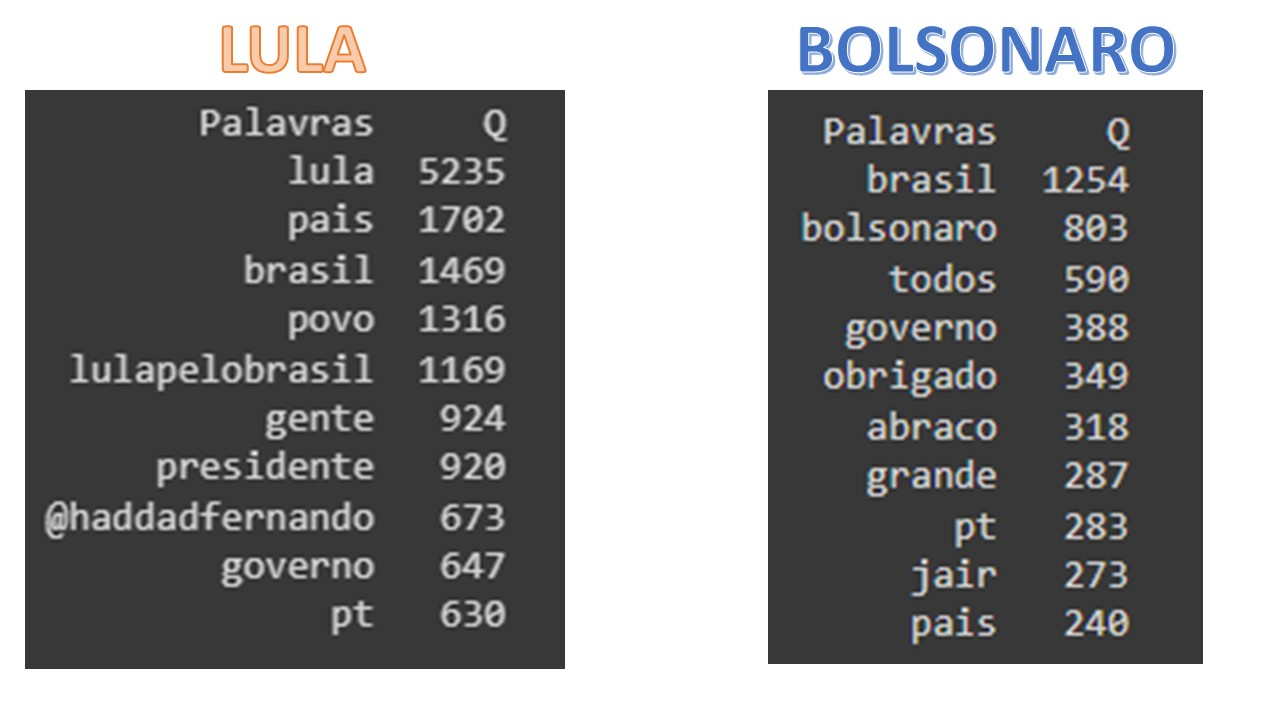


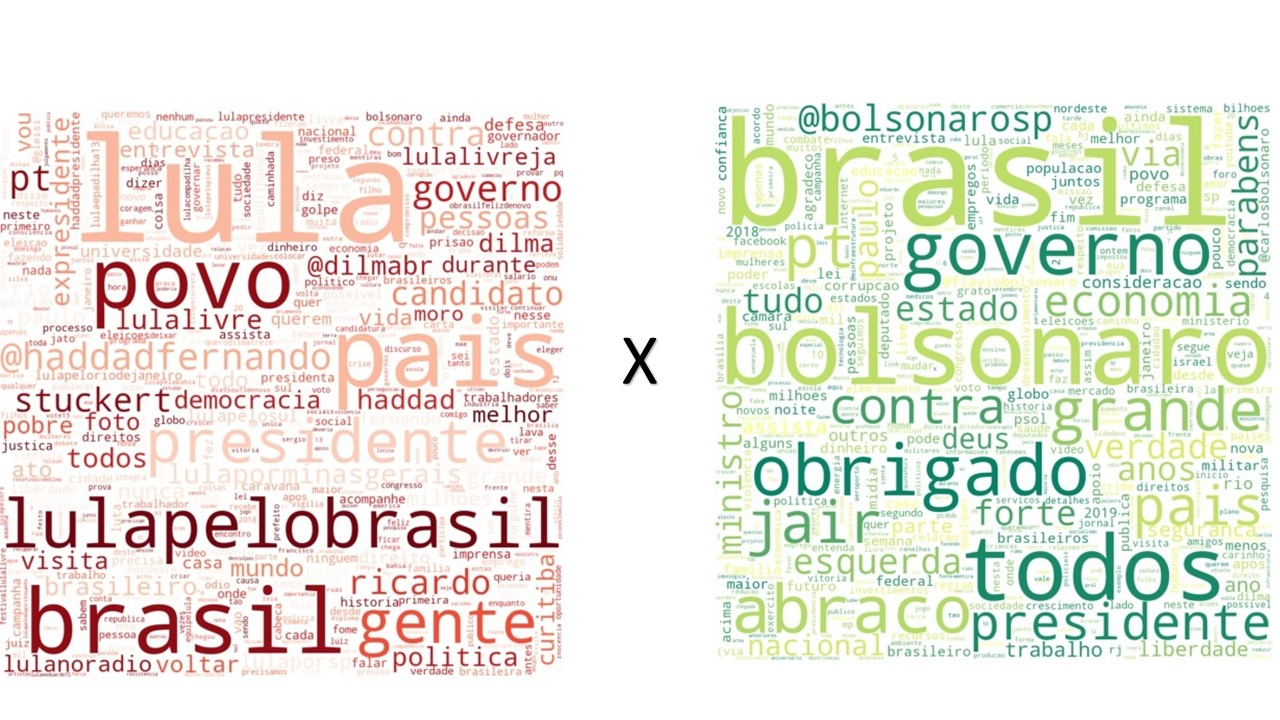

